In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
rmf = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\ClassWork\Cases\Recency Frequency Monetary\rfm_data_customer.csv",index_col=0)
rmf.drop("most_recent_visit",axis=1,inplace = True)
rmf.head()

,revenue,number_of_orders,recency_days
customer_id,,,
22086,777,9,232
2290,1555,16,115
26377,336,5,43
24650,1189,12,64
12883,1229,12,23


Best no. of clusters: 3
Best Score: 0.37061959467764677


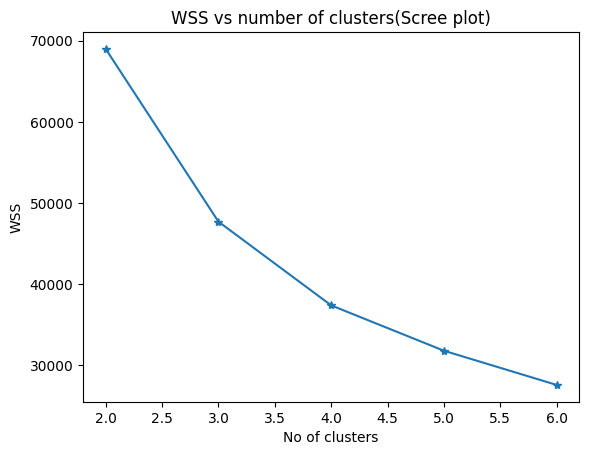

In [3]:
scaler = StandardScaler().set_output(transform='pandas')
rmf_scaled = scaler.fit_transform(rmf)

Ks = np.arange(2,7)
scores = []
inertia = []

for i in Ks:
    clust = KMeans(n_clusters=i,random_state=24,init='random')
    clust.fit(rmf_scaled)
    scores.append(silhouette_score(rmf_scaled, clust.labels_))
    inertia.append(clust.inertia_)

i_max = np.argmax(scores)
print("Best no. of clusters:", Ks[i_max])
print("Best Score:", scores[i_max])


plt.plot(Ks,inertia,marker='*')
plt.title("WSS vs number of clusters(Scree plot)")
plt.xlabel("No of clusters")
plt.ylabel("WSS");
plt.show()

In [4]:
clust = KMeans(n_clusters= Ks[i_max],random_state=24,init='random')
clust.fit(rmf_scaled)

#prcomp = PCA().set_output(transform='pandas')
#principalComponents = prcomp.fit_transform(rmf_scaled)
#print(np.cumsum(prcomp.explained_variance_ratio_*100))

#principalComponents["Clust"]=clust.labels_.astype(str)
#sns.scatterplot(x='pca0',y='pca1',data=principalComponents, hue='Clust')
#for i in np.arange(0,rmf_scaled.shape[0]):
#    plt.text(principalComponents.values[i,0],principalComponents.values[i,1],list(rmf_scaled.index)[i])
#plt.show()

KMeans(init='random', n_clusters=3, random_state=24)

In [5]:
clust_rmf= rmf.copy()
clust_rmf['Clust'] = clust.labels_.astype(str)

clust_rmf.groupby('Clust').mean()

,revenue,number_of_orders,recency_days
Clust,,,
0,751.444241,8.247976,135.699126
1,1283.341615,12.928099,133.313124
2,691.681129,7.345744,415.508632


In [6]:
clust_rmf['Clust'].value_counts()

Clust
0    18526
1    14812
2     6661
Name: count, dtype: int64

In [7]:
rmf.corr()

,revenue,number_of_orders,recency_days
revenue,1.000000,0.857230,-0.270513
number_of_orders,0.857230,1.000000,-0.318169
recency_days,-0.270513,-0.318169,1.000000


In [8]:
clust_rmf.groupby('Clust').corr()

revenue  number_of_orders  recency_days
Clust                                                           
0     revenue           1.000000          0.634338     -0.009422
      number_of_orders  0.634338          1.000000     -0.044083
      recency_days     -0.009422         -0.044083      1.000000
1     revenue           1.000000          0.606192     -0.010790
      number_of_orders  0.606192          1.000000     -0.058797
      recency_days     -0.010790         -0.058797      1.000000
2     revenue           1.000000          0.798878     -0.093751
      number_of_orders  0.798878          1.000000     -0.152107
      recency_days     -0.093751         -0.152107      1.000000

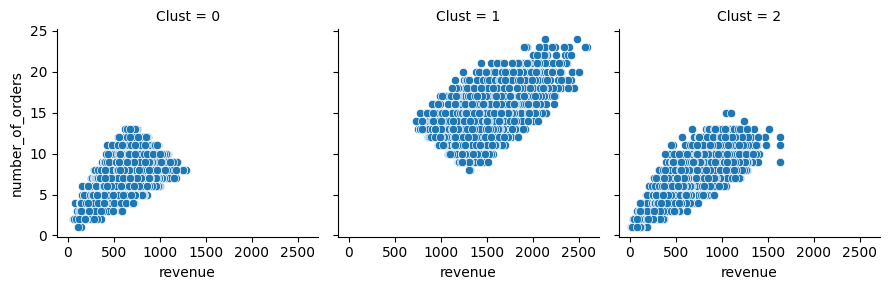

In [9]:
g = sns.FacetGrid(clust_rmf,col='Clust')
g.map(sns.scatterplot,'revenue','number_of_orders')
plt.show()

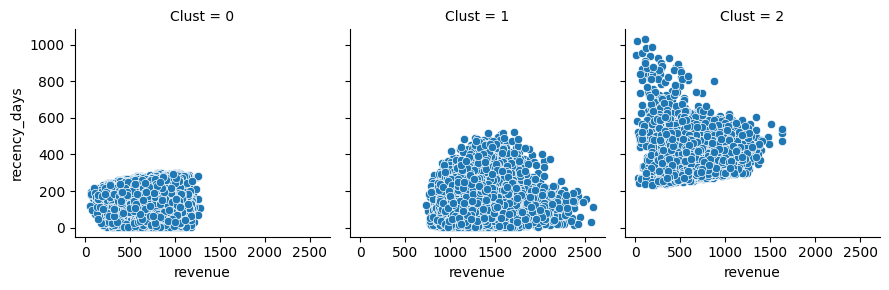

In [10]:
g = sns.FacetGrid(clust_rmf,col='Clust')
g.map(sns.scatterplot,'revenue','recency_days')
plt.show()

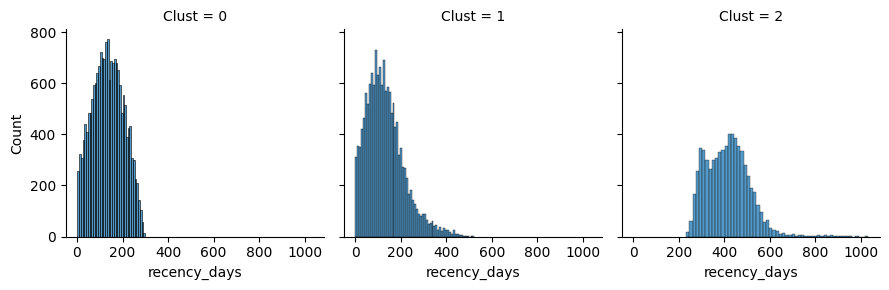

In [11]:
g = sns.FacetGrid(clust_rmf,col='Clust')
g.map(sns.histplot,'recency_days')
plt.show()

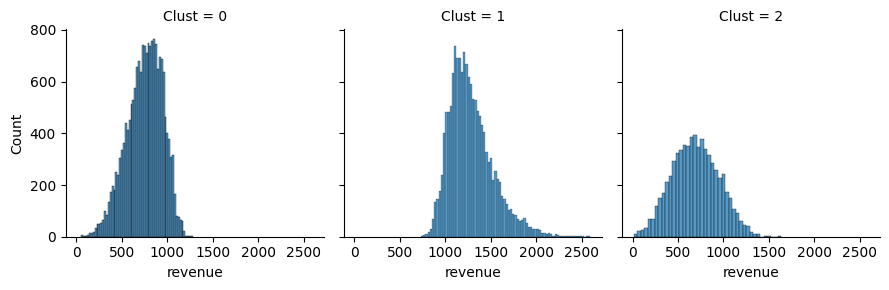

In [12]:
g = sns.FacetGrid(clust_rmf,col='Clust')
g.map(sns.histplot,'revenue')
plt.show()

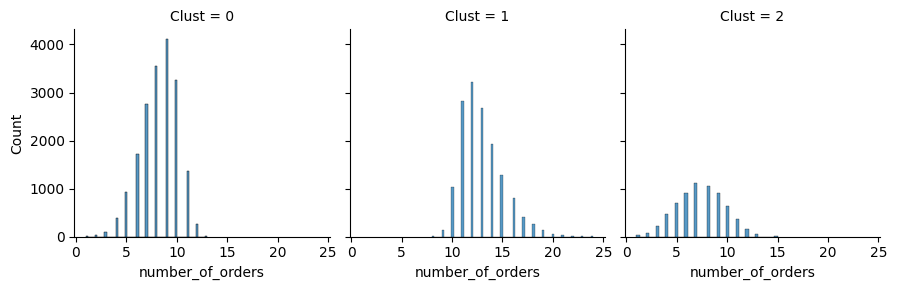

In [13]:
g = sns.FacetGrid(clust_rmf,col='Clust')
g.map(sns.histplot,'number_of_orders')
plt.show()